In [1]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt

In [3]:
# True coefficients
a_true, b_true, c_true, d_true = 1.5, -2.0, 0.8, 4.0

x = torch.linspace(-2, 2, 200)
y = a_true*x**3 + b_true*x**2 + c_true*x + d_true

In [5]:
a = torch.randn(1, requires_grad=True)
b = torch.randn(1, requires_grad=True)
c = torch.randn(1, requires_grad=True)
d = torch.randn(1, requires_grad=True)

In [7]:
def model(x):
    return F.relu(a*x**3 + b*x**2 + c*x + d)

In [9]:
lr, epochs = 1e-3, 3000
for epoch in range(epochs):
    y_pred = model(x)
    loss = F.mse_loss(y_pred, F.relu(y))

    loss.backward()
    with torch.no_grad():
        for param in [a, b, c, d]:
            param -= lr * param.grad
            param.grad.zero_()

    if epoch % 500 == 0:
        print(f"Epoch {epoch}, loss = {loss.item():.4f}")

Epoch 0, loss = 7.8334
Epoch 500, loss = 2.0612
Epoch 1000, loss = 1.1261
Epoch 1500, loss = 0.7166
Epoch 2000, loss = 0.4884
Epoch 2500, loss = 0.3501


Learned: a=0.84, b=-0.42, c=0.66, d=3.11


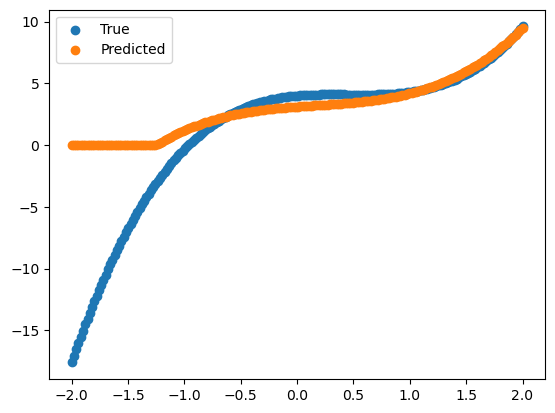

In [11]:
print(f"Learned: a={a.item():.2f}, b={b.item():.2f}, c={c.item():.2f}, d={d.item():.2f}")
plt.scatter(x, y, label="True")
plt.scatter(x, model(x).detach(), label="Predicted")
plt.legend()
plt.show()